In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
ruta = '/content/drive/MyDrive/PM25_RUOA_UNIDO.csv'
df = pd.read_csv(ruta)


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime', 'PM25'])
df = df.sort_values('datetime')
df['month'] = df['datetime'].dt.to_period('M')

In [6]:
resumen = df.groupby('month')['PM25'].agg(['count', 'mean', 'max', 'min', 'std']).reset_index()
resumen['month'] = resumen['month'].astype(str)


In [7]:
print("📊 Resumen mensual de PM2.5")
print(resumen.head())

📊 Resumen mensual de PM2.5
     month  count       mean    max   min       std
0  2015-01    157   9.654331  32.21  4.11  4.532035
1  2015-02    528  10.041212  37.24  4.01  4.747818
2  2015-03    547   9.389707  27.79  4.02  4.050898
3  2015-04    600   9.678983  28.72  4.04  4.316207
4  2015-05    617   9.558493  37.16  4.00  5.018036


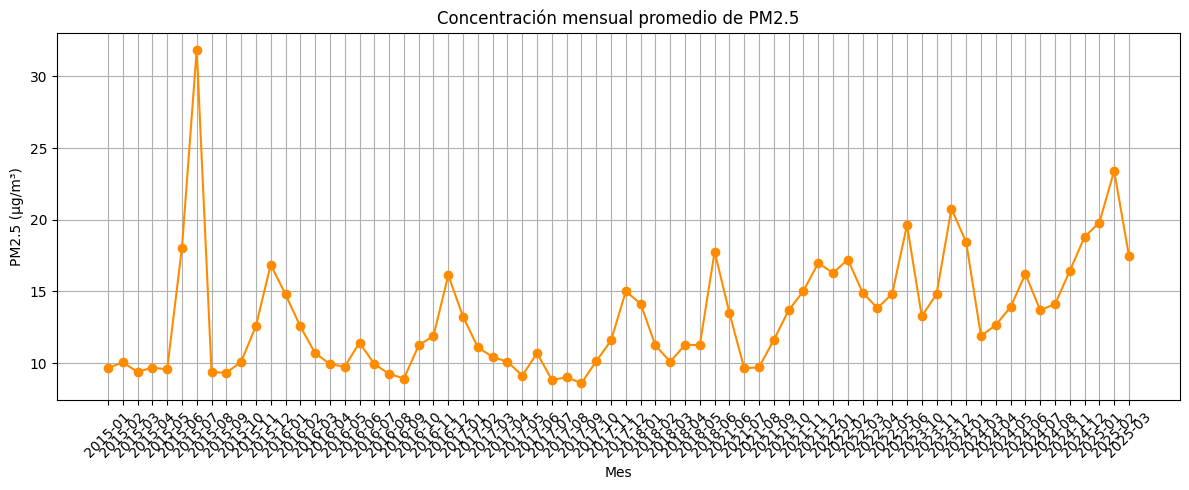

In [11]:

resumen_filtrado = resumen[resumen['mean'] < 80]

plt.figure(figsize=(12,5))
plt.plot(resumen_filtrado['month'], resumen_filtrado['mean'], marker='o', color='darkorange')
plt.xticks(rotation=45)
plt.title('Concentración mensual promedio de PM2.5')
plt.xlabel('Mes')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()
